In [7]:
import tkinter as tk
from tkinter import ttk, messagebox
import mysql.connector

# Function to create a database connection
def get_db_connection():
    return mysql.connector.connect(
        host='localhost',
        user='root',
        password='1234',
        database='nit'
    )

# Function to add student to the database
def add_student():
    studentname = e2.get()
    coursename = e3.get()
    fee = e4.get()
    Gender = e5.get()
    College = e6.get()

    if not studentname or not coursename or not fee:
        messagebox.showerror("Input Error", "All fields must be filled.")
        return
   
    try:
        conn = get_db_connection()
        cursor = conn.cursor()

        sql = "INSERT INTO registration (name, course, fee, Gender, College) VALUES (%s, %s, %s, %s, %s)"
        values = (studentname, coursename, fee, Gender, College)
       
        cursor.execute(sql, values)
        conn.commit()
       
        messagebox.showinfo("Success", "Student record added successfully!")

        e2.delete(0, tk.END)
        e3.delete(0, tk.END)
        e4.delete(0, tk.END)
        e5.delete(0, tk.END)
        e6.delete(0, tk.END)
       
        load_students()

    except mysql.connector.Error as err:
        messagebox.showerror("Database Error", f"Failed to insert student: {err}")
    finally:
        conn.close()

# Function to update student record
def update_student():
    selected_item = listBox.selection()
    if not selected_item:
        messagebox.showerror("Selection Error", "Please select a student to update.")
        return

    studentid = e1.get()
    studentname = e2.get()
    coursename = e3.get()
    fee = e4.get()
    Gender = e5.get()
    College = e6.get()

    if not studentname or not coursename or not fee or not Gender or not College:
        messagebox.showerror("Input Error", "All fields must be filled.")
        return

    try:
        conn = get_db_connection()
        cursor = conn.cursor()

        sql = "UPDATE registration SET name=%s, course=%s, fee=%s , Gender=%s, College=%s WHERE id=%s"
        values = (studentname, coursename, fee, Gender, College ,studentid)
       
        cursor.execute(sql, values)
        conn.commit()
       
        messagebox.showinfo("Success", "Student record updated successfully!")

        e1.delete(0, tk.END)
        e2.delete(0, tk.END)
        e3.delete(0, tk.END)
        e4.delete(0, tk.END)
        e5.delete(0, tk.END)
        e6.delete(0, tk.END)


        load_students()

    except mysql.connector.Error as err:
        messagebox.showerror("Database Error", f"Failed to update student: {err}")
    finally:
        conn.close()

# Function to delete a student
def delete_student():
    studentid = e1.get()  # Get the student ID from the entry field

    if not studentid:
        messagebox.showerror("Selection Error", "Please select a student to delete.")
        return
   
    try:
        conn = get_db_connection()
        cursor = conn.cursor()

        sql = "DELETE FROM registration WHERE id=%s"
        cursor.execute(sql, (studentid,))
        conn.commit()

        messagebox.showinfo("Success", "Student record deleted successfully!")

        e1.delete(0, tk.END)
        e2.delete(0, tk.END)
        e3.delete(0, tk.END)
        e4.delete(0, tk.END)
        e5.delete(0, tk.END)
        e6.delete(0, tk.END)

        load_students()

    except mysql.connector.Error as err:
        messagebox.showerror("Database Error", f"Failed to delete student: {err}")
    finally:
        conn.close()

# Function to load students into the Treeview
def load_students():
    # Remove all previous entries in the Treeview
    for row in listBox.get_children():
        listBox.delete(row)

    try:
        conn = get_db_connection()
        cursor = conn.cursor()

        cursor.execute("SELECT * FROM registration")
        rows = cursor.fetchall()

        for row in rows:
            listBox.insert("", "end", values=row)

    except mysql.connector.Error as err:
        messagebox.showerror("Database Error", f"Failed to load students: {err}")
    finally:
        conn.close()

# Function to populate the entry fields when a row is selected
def on_treeview_select(event):
    selected_item = listBox.selection()
    if selected_item:
        student = listBox.item(selected_item)
        studentid, studentname, coursename, fee = student['values']
       
        # Populate the entry fields with the selected student's data
        e1.config(state="normal")  # Make the ID entry editable to update
        e1.delete(0, tk.END)
        e1.insert(0, studentid)  # Set the student ID for deletion or update

        e2.delete(0, tk.END)
        e2.insert(0, studentname)

        e3.delete(0, tk.END)
        e3.insert(0, coursename)

        e4.delete(0, tk.END)
        e4.insert(0, fee)
        e5.delete(0, tk.END)
        e5.insert(0, Gender)
        e6.delete(0, tk.END)
        e6.insert(0, College)



# Create the main window
root = tk.Tk()
root.geometry('600x500')
root.title("Student Registration System")

# Labels and Entry Fields
tk.Label(root, text="Student ID").grid(row=0, column=0, padx=10, pady=10)
tk.Label(root, text="Name").grid(row=1, column=0, padx=10, pady=10)
tk.Label(root, text="Course").grid(row=2, column=0, padx=10, pady=10)
tk.Label(root, text="Fee").grid(row=3, column=0, padx=10, pady=10)
tk.Label(root, text="Gender").grid(row=4, column=0, padx=10, pady=10)
tk.Label(root, text="College").grid(row=5, column=0, padx=10, pady=10)

e1 = tk.Entry(root)
e1.grid(row=0, column=1, padx=10, pady=10)
e1.config(state="disabled")  # Initially disabled, editable when selecting a student

e2 = tk.Entry(root)
e2.grid(row=1, column=1, padx=10, pady=10)

e3 = tk.Entry(root)
e3.grid(row=2, column=1, padx=10, pady=10)

e4 = tk.Entry(root)
e4.grid(row=3, column=1, padx=10, pady=10)

e5 = tk.Entry(root)
e5.grid(row=4, column=1, padx=10, pady=10)
e6 = tk.Entry(root)
e6.grid(row=5, column=1, padx=10, pady=10)
# Buttons
tk.Button(root, text="Add", command=add_student).grid(row=7, column=0, padx=10, pady=10)
tk.Button(root, text="Update", command=update_student).grid(row=7, column=1, padx=10, pady=10)
tk.Button(root, text="Delete", command=delete_student).grid(row=7, column=2, padx=10, pady=10)

# Treeview to display students
cols = ("id", "name", "course", "fee")
listBox = ttk.Treeview(root, columns=cols, show="headings")
listBox.grid(row=8, column=0, columnspan=3, padx=10, pady=10)

for col in cols:
    listBox.heading(col, text=col)
    listBox.column(col, width=150)

# Bind the select event to populate entry fields when a row is clicked
listBox.bind("<ButtonRelease-1>", on_treeview_select)

# Load the student records when the application starts
load_students()

# Start the Tkinter event loop
root.mainloop()


(np.float64(-0.5), np.float64(891.5), np.float64(782.5), np.float64(-0.5))

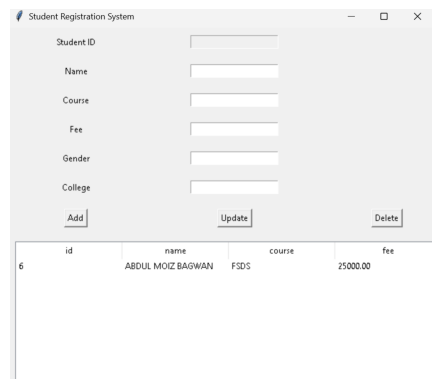

In [5]:
import matplotlib.pyplot as plt
img = plt.imread(r"C:\Users\hp\OneDrive\Pictures\Student registration form.png")    
plt.imshow(img)
plt.axis('off')